In [2]:
# Importing the libraries to be used:
# The reference of the code below is from hw5 programming assignment
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data.csv')
df1 = df.to_numpy()
X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)

In [4]:
# df = pd.read_csv('data.csv')
# df1 = df.to_numpy()
# #df1[df1[:,-1]==1].shape
# random_indices = np.random.choice(df1[df1[:,-1]==0].shape[0], size=1554, replace = False)
# df1 = np.concatenate((df1[df1[:,-1]==0][random_indices, :], df1[df1[:,-1]==1]))
# X = df1[:,:-1]
# scaler = preprocessing.StandardScaler().fit(X)
# X = scaler.transform(X)
# Y = df1[:,-1:].reshape(X.shape[0],)

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [87]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train,Y_train)
X_train, Y_train = X_smote, Y_smote

In [88]:
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver= 'saga', max_iter=4000)
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    
    Yhat_test = logreg.predict(X_test)
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    weight_logreg.append(logreg.coef_[0])
    intercept_logreg.append(logreg.intercept_)

    prec, recal, fscore, support = precision_recall_fscore_support(Y_train,  Yhat_train)
    prec_logreg.append(prec[0])
    recal_logreg.append(recal[0])
    fscore_logreg.append(fscore[0])

In [89]:
def plot_acc(acc_train, acc_test, lamb):
    labels = ['0.001', '0.01', '0.1', '1', '10', '100']
    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, acc_train, width, label='training',color = '#85C1E9')
    rects2 = ax.bar(x + width/2, acc_test, width, label='testing', color = '#F5B7B1')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Lambda')
    ax.set_title('Accuracy vs lambda')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    rects1[acc_train.index(max(acc_train))].set_color('#2874A6')
    rects2[acc_test.index(max(acc_test))].set_color('#B03A2E')
    print("training max accuracy:", max(acc_train))
    print("test max accuracy:", max(acc_test))
    plt.show()

In [90]:
def plot_pre(prec, recal, fscore,lamb):
    labels = ['0.001', '0.01', '0.1', '1', '10', '100']
    x = np.arange(len(labels))
    width = 0.25
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, prec, width, label='precision',color = '#85C1E9')
    rects2 = ax.bar(x, recal, width, label='recall', color = '#F5B7B1')
    rects3 = ax.bar(x + width, fscore, width, label='fscore', color = '#F9E79F')
    ax.set_ylabel('Precision/recall/fscore')
    ax.set_xlabel('Lambda')
    ax.set_title('Precision/recall/fscore vs lambda')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    rects1[prec.index(max(prec))].set_color('#2874A6')
    rects2[recal.index(max(recal))].set_color('#B03A2E')
    rects3[fscore.index(max(fscore))].set_color('#F1C40F')
    print("max precision:", max(prec))
    print("max recall:", max(recal))
    print("max fscore:", max(fscore))
    plt.show()

In [91]:
def plot_weight(acc_test, weight):
    max_acc = max(acc_test)
    index = acc_test.index(max_acc)
    print(max_acc, lamb[index])
    weight[index]
    plt.bar([i for i in range(len(weight[0]))],weight[index])

In [92]:
# lamb = [i/1000 for i in range(1,10000,10)]
lamb = [0.001,0.01,0.1,1,10,100]
cVals = [1/i for i in lamb]
acc_train_logreg = [] 
acc_test_logreg = []
weight_logreg=[]
intercept_logreg=[]
prec_logreg=[]
recal_logreg=[]
fscore_logreg=[]
for c in cVals:
    logreg_model(c, X_train, Y_train, X_test, Y_test)



0.703989703989704 100


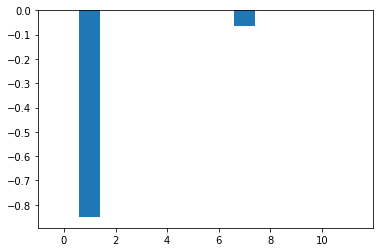

In [93]:
plot_weight(acc_test_logreg, weight_logreg)

max precision: 0.685
max recall: 0.8250428816466552
max fscore: 0.7474668745128606


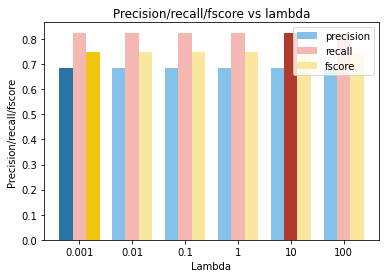

In [94]:
plot_pre(prec_logreg, recal_logreg, fscore_logreg,lamb)

training max accuracy: 0.7221269296740995
test max accuracy: 0.703989703989704


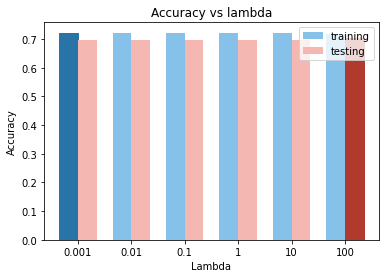

In [95]:
plot_acc(acc_train_logreg, acc_test_logreg, lamb)

In [96]:
def logreg_model2(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(penalty='l2', C=c, max_iter=4000)
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    
    Yhat_test = logreg.predict(X_test)
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    weight_logreg2.append(logreg.coef_[0])
    intercept_logreg2.append(logreg.intercept_)

    prec, recal, fscore, support = precision_recall_fscore_support(Y_train,  Yhat_train)
    prec_logreg2.append(prec[0])
    recal_logreg2.append(recal[0])
    fscore_logreg2.append(fscore[0])

In [97]:
acc_train_logreg2 = [] 
acc_test_logreg2 = []
weight_logreg2=[]
intercept_logreg2=[]
prec_logreg2=[]
recal_logreg2=[]
fscore_logreg2=[]
for c in cVals:
    logreg_model2(c, X_train, Y_train, X_test, Y_test)

0.7027027027027027 100


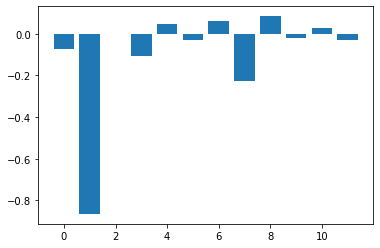

In [98]:
plot_weight(acc_test_logreg2, weight_logreg2)

max precision: 0.6879942487419123
max recall: 0.8224699828473413
max fscore: 0.7485334376222136


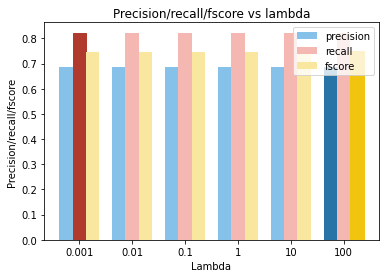

In [99]:
plot_pre(prec_logreg2, recal_logreg2, fscore_logreg2,lamb)

training max accuracy: 0.7242710120068611
test max accuracy: 0.7027027027027027


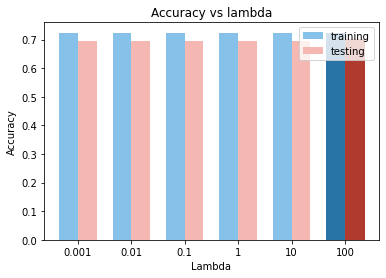

In [100]:
plot_acc(acc_train_logreg2, acc_test_logreg2, lamb)

In [101]:
from sklearn.preprocessing import PolynomialFeatures

In [102]:
poly = PolynomialFeatures(2)

In [103]:
X_transformed = poly.fit_transform(df1[:,:-1])
scaler = preprocessing.StandardScaler().fit(X_transformed)
X_transformed = scaler.transform(X_transformed)
X_transformed_train, X_transformed_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.25, random_state=42)

In [22]:
acc_train_logreg = []
acc_test_logreg = []
weight_logreg=[]
intercept_logreg=[]
prec_logreg=[]
recal_logreg=[]
fscore_logreg=[]
for c in cVals:
    logreg_model(c, X_transformed_train, Y_train, X_transformed_test, Y_test)

0.8610648918469218 0.1


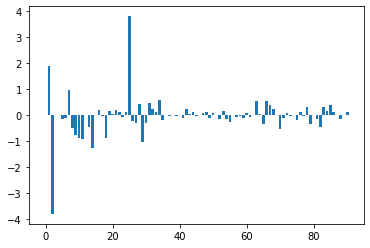

In [23]:
plot_weight(acc_test_logreg, weight_logreg)

max precision: 0.8838778953827274
max recall: 0.9865982792852416
max fscore: 0.9172968240070047


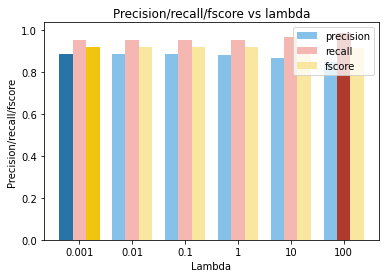

In [24]:
plot_pre(prec_logreg, recal_logreg, fscore_logreg,lamb)

training max accuracy: 0.85591457495493
test max accuracy: 0.8610648918469218


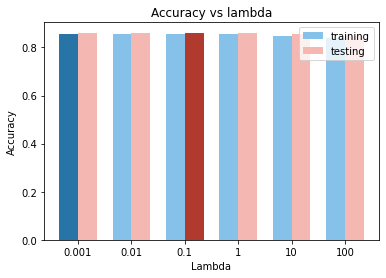

In [25]:
plot_acc(acc_train_logreg, acc_test_logreg, lamb)

In [26]:
acc_train_logreg2 = []
acc_test_logreg2 = []
weight_logreg2=[]
intercept_logreg2=[]
prec_logreg2=[]
recal_logreg2=[]
fscore_logreg2=[]
for c in cVals:
    logreg_model2(c, X_transformed_train, Y_train, X_transformed_test, Y_test)

0.8610648918469218 0.1


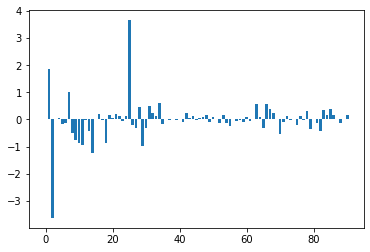

In [27]:
plot_weight(acc_test_logreg2, weight_logreg2)

max precision: 0.8841313689379988
max recall: 0.9670747849106552
max fscore: 0.9173566878980892


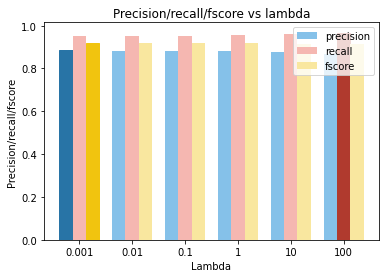

In [28]:
plot_pre(prec_logreg2, recal_logreg2, fscore_logreg2,lamb)

training max accuracy: 0.8560532519761476
test max accuracy: 0.8610648918469218


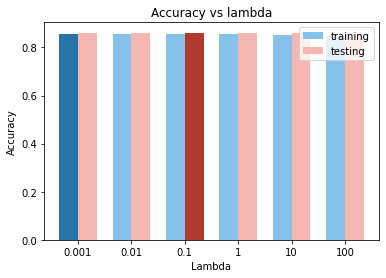

In [29]:
plot_acc(acc_train_logreg2, acc_test_logreg2, lamb)